#**<font color='orange'>Explorando los Datos</font>**

##**<font color='green'>Importando Librerias</font>**

In [76]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt


print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [77]:
datos = pd.read_csv('/content/telecomX_ready_for_analysis.csv')
datos.head()

,customerid,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40



Diccionario de datos

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente







#**<font color='orange'>Eliminación de Columnas Irrelevantes</font>**

Descripción

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [78]:
df = datos.drop(columns=['customerid'])
df.sample(5)


,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
1940,1,Male,1,0,0,5,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,70.25,331.9
5636,0,Female,0,0,0,60,1,Yes,DSL,Yes,No,Yes,Yes,No,No,One year,0,Electronic check,64.75,4039.5
308,0,Female,0,1,1,3,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,69.55,200.2
6603,0,Male,0,0,0,43,1,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,One year,1,Credit card (automatic),90.65,3882.3
2948,0,Male,1,1,0,67,1,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,0,Bank transfer (automatic),102.90,6989.7


##**<font color='turquoise'>Estadistica Descriptiva Para las Variables Categóricas</font>**

In [79]:
df.describe(include=['O'])

,gender,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,payment_method
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,3,3,3,3,3,3,3,3,3,4
top,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


#**<font color='orange'>Encoding</font>**

Descripción

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:

##**<font color='turquoise'>Paso 1. Identificar las Variables Categoricas</font>**

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn              7043 non-null   int64  
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   int64  
 4   dependents         7043 non-null   int64  
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   int64  
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

##**<font color='turquoise'>Columnas Categoricas</font>**





In [81]:
columnas_categoricas = df.select_dtypes(include=['object']).columns

print('Columnas Categóricas:')
print(columnas_categoricas)

Columnas Categóricas:
Index(['gender', 'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'payment_method'],
      dtype='object')


##**<font color='turquoise'>one-hot encoding</font>**

In [82]:
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)
print('Nuevo Tamaño del Dataset:', df.shape)


Nuevo Tamaño del Dataset: (7043, 31)


In [83]:
# Convertir las columnas a numericas
df = df.astype(int)

In [84]:
df.head()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,gender_Male,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,0,1,1,9,1,1,65,593,0,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,0,9,1,0,59,542,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,4,1,1,73,280,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98,1237,1,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1,0,3,1,1,83,267,0,...,1,0,1,0,0,0,0,0,0,1


#**<font color='orange'>Verificación de la Proporción de Cancelación (Churn)</font>**

Descripción

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar `value_counts()` de pandas para obtener esta proporción:

In [85]:
conteo = df['churn'].value_counts()
proporcion_churn = df['churn'].value_counts(normalize=True)
porcentaje_churn = df['churn'].value_counts(normalize=True) * 100


##**<font color='turquoise'>Regla general en Machine Learning:</font>**

**Proporción	Nivel de desbalance**
* 50% / 50%	balanceado
* 60 / 40	leve
* 70 / 30	moderado
* 80 / 20	alto
* 90 / 10	severo

In [86]:
print('Conteo:')
print(conteo)

print('\nProporcion:')
print(proporcion_churn)

print('\nPorcentaje %')
print(porcentaje_churn)

print('\nNOTA: Evaluacion del desbalance Moderado')

Conteo:
churn
0    5174
1    1869
Name: count, dtype: int64

Proporcion:
churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Porcentaje %
churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

NOTA: Evaluacion del desbalance Moderado


##**<font color='turquoise'>Visualizar el Desbalance</font>**

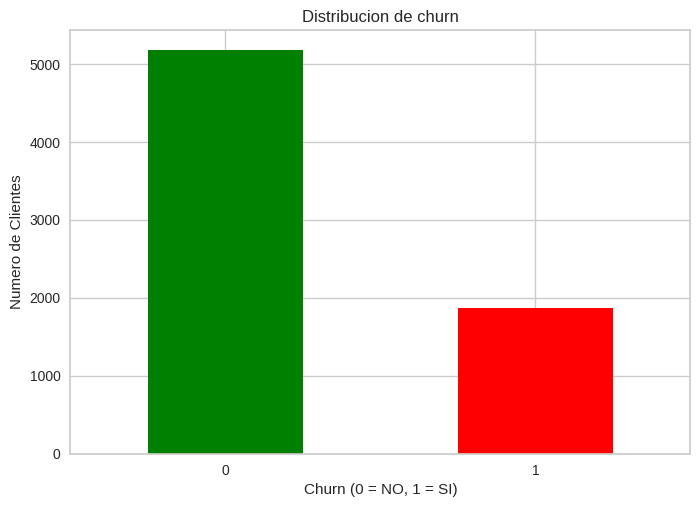

In [87]:
df['churn'].value_counts().plot(kind='bar', color=['green', 'red'])

plt.title('Distribucion de churn')
plt.xlabel('Churn (0 = NO, 1 = SI)')
plt.ylabel('Numero de Clientes')
plt.xticks(rotation=0)

plt.show();

#**<font color='orange'>Balanceo de Clases (opcional)</font>**

Descripción

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.



##**<font color='turquoise'>Separando Variable Predictora (X) y Variable Objetivo (y)</font>**

In [88]:
# Variable predictora
X = df.drop(['churn'], axis=1)

# Variable Objetivo
y = df['churn']

print('X:', X.shape)
print('y:', y.shape)

X: (7043, 30)
y: (7043,)


##**<font color='turquoise'>Antes de Balancear, Dividimos en Entramiento y Prueba</font>**

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size=0.2,    # 20% de prueba, 80% entrenamiento
                                    random_state=42,  # Reproducibilidad
                                    stratify=y)       # stratify=y; mantiene la proporcion original de clases en ambos conjuntos



##**<font color='turquoise'>Desbalance en entrenamiento</font>**

In [90]:
print('Distribucion antes del balanceo')
print(y_train.value_counts())

Distribucion antes del balanceo
churn
0    4139
1    1495
Name: count, dtype: int64


##**<font color='turquoise'>Balanceo SMOTE</font>**


In [91]:
from imblearn.over_sampling import SMOTE

# Crear objeto SMOTE
smote = SMOTE(random_state=42)

# Aplica solo al conjunto de entrenamiento
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [92]:
print('Distribucion despues de SMOTE')
print(y_train_bal.value_counts())

Distribucion despues de SMOTE
churn
0    4139
1    4139
Name: count, dtype: int64


#**<font color='orange'>Normalización o Estandarización (si es necesario)</font>**

Descripción

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

##**<font color='turquoise'>Escalado de Variables</font>**

In [93]:
from sklearn.preprocessing import StandardScaler

# Crea el Escaler
scaler = StandardScaler()

# Ajuste
scaler.fit(X_train_bal)

# Transformar Entrenamiento
X_train_scaled = scaler.transform(X_train_bal)

# Transforma Prueba
X_test_scaled = scaler.transform(X_test)

print('Entrenamiento Original', X_train_bal.shape)
print('Entrenamiento Escalado', X_train_scaled.shape)

print('Prueba Original', X_test.shape)
print('Prueba Escalada', X_test_scaled.shape)

Entrenamiento Original (8278, 30)
Entrenamiento Escalado (8278, 30)
Prueba Original (1409, 30)
Prueba Escalada (1409, 30)


#**<font color='orange'>Análisis de Correlación</font>**

Descripción

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

##**<font color='turquoise'>Matrix de Correlacion</font>**

In [94]:
# Calcula la matrix de correlacion
corr_matrix = df.corr()
corr_matrix.head()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,gender_Male,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
churn,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193422,-0.198326,-0.008612,...,-0.164674,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,-0.134302,0.301919,-0.091683
senior_citizen,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220129,0.103008,-0.001874,...,-0.060625,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
partner,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096913,0.317503,-0.001808,...,0.119999,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,0.082029,-0.083852,-0.095125
dependents,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113910,0.062078,0.010517,...,0.063268,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,0.060267,-0.150642,0.059071
tenure,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247917,0.826179,0.005106,...,0.324221,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.233006,-0.208363,-0.233852


##**<font color='turquoise'>Visualizar Matriz General</font>**

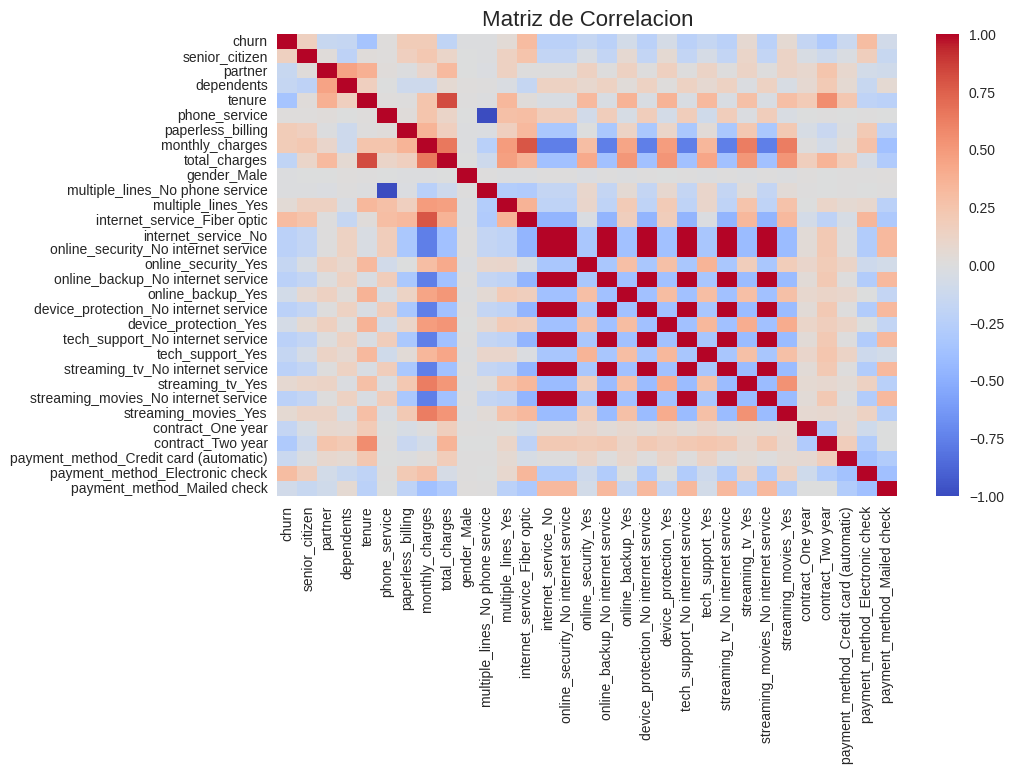

In [95]:
plt.figure(figsize=(10,6))

sns.heatmap(
    corr_matrix,
    annot=False, # Para no mostrar los numeros
    cmap='coolwarm', # Colores
    center=0
)
plt.title('Matriz de Correlacion', fontsize=16)
plt.show();

##**<font color='turquoise'>Visualizar Matriz con churn</font>**

In [96]:
# Correlacion con churn
corr_con_churn = corr_matrix['churn'].sort_values(ascending=False)


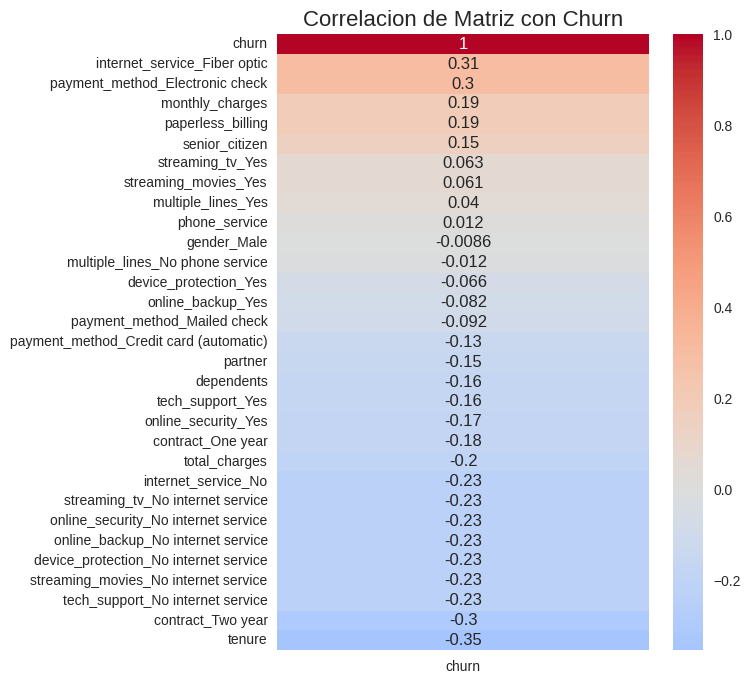

In [97]:
plt.figure(figsize=(6,8))

sns.heatmap(
    corr_con_churn.to_frame(),
    annot=True, # Para no mostrar los numeros
    cmap='coolwarm', # Colores
    center=0
)
plt.title('Correlacion de Matriz con Churn', fontsize=16)
plt.show();

In [98]:
# Top de Varoables correlacionadas con churn
top_corr = corr_con_churn[abs(corr_con_churn) > 0.2]
top_corr

,churn
churn,1.000000
internet_service_Fiber optic,0.308020
payment_method_Electronic check,0.301919
internet_service_No,-0.227890
streaming_tv_No internet service,-0.227890
online_security_No internet service,-0.227890
online_backup_No internet service,-0.227890
device_protection_No internet service,-0.227890
streaming_movies_No internet service,-0.227890
tech_support_No internet service,-0.227890


#**<font color='orange'>Análisis Dirigido</font>**

Descripción

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

    Tiempo de contrato × Cancelación

    Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.



#**<font color='orange'>Separación de Datos</font>**

Descripción

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

#**<font color='orange'>Creación de Modelos</font>**

Descripción

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

* Un modelo puede requerir normalización, como Regresión Logística o KNN.

* El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

* Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

* Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

#**<font color='orange'>Evaluación de los Modelos</font>**

Descripción

Evalúa cada modelo utilizando las siguientes métricas:

* Exactitud (Acurácia)

* Precisión

* Recall

* F1-score

* Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

 *¿Cuál modelo tuvo el mejor desempeño?

* ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

<font color='green'>Overfitting:</font> Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

<font color='green'>Underfitting:</font> Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

#**<font color='orange'>Análisis de la Importancia de las Variables</font>**

Descripción

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

* <font color='green'>Regresión Logística:</font> Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

* <font color='green'>KNN (K-Nearest Neighbors):</font> Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

* <font color='green'>Random Forest:</font> Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

* <font color='green'>SVM (Support Vector Machine):</font> En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

* <font color='green'>Otros Modelos:</font> Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).


#**<font color='orange'>Conclusión</font>**

Descripción

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.